<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v1_1_0(hui).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [3]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [4]:
train_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,2,處女座,Apple,154.0,43.0,NaN,NaN,583.0,0,Beautiful
1,2,2,處女座,Apple,156.0,47.0,NaN,130.0,NaN,3.5,Enjoying being who I'm notsss
2,3,1,射手座,NaN,170.0,61.0,NaN,90.0,540.0,NaN,Practice Makes perfect
3,4,1,射手座,Apple,170.0,62.0,4.0,100.0,NaN,5,Straightforward
4,5,2,射手座,Android,158.0,67.0,NaN,128.0,320.0,1.2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...
418,419,1,處女座,Android,166.0,66.0,4.0,90.0,1000.0,1,I hope i am a super hero.
419,420,1,牡羊座,Android,176.0,65.0,4.0,87.0,1300.0,2,NaN
420,421,1,NaN,Apple,174.0,72.0,2.0,NaN,2000.0,9,NaN
421,422,2,天蠍座,NaN,167.0,50.0,3.0,180.0,483.0,10,NaN


In [5]:
test_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,0,天蠍座,Apple,200.0,100.0,1.0,87.0,87.0,87.0,GOod
1,2,0,金牛座,Apple,175.0,80.0,3.0,NaN,2000.0,NaN,Easygoing
2,3,0,雙子座,Apple,155.0,45.0,3.0,150.0,NaN,9.0,NaN
3,4,0,處女座,Apple,173.0,85.0,4.0,NaN,NaN,15.0,NaN
4,5,0,射手座,Android,164.0,57.0,4.0,130.0,505.0,2.0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...
421,422,0,金牛座,Apple,160.0,70.0,4.0,NaN,500.0,5.0,I am a girl.
422,423,0,天蠍座,Android,162.0,54.0,3.0,180.0,462.0,5.0,NaN
423,424,0,天蠍座,Apple,173.0,66.0,NaN,135.0,102.0,11.1,I like to play basketball.
424,425,0,NaN,NaN,165.0,53.0,NaN,110.0,507.0,416.0,Good


<h1>缺失比例查看

In [6]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


<h1>刪除欄位

In [7]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()

train_df.drop(columns=["star_sign"], inplace=True)
test_df.drop(columns=["star_sign"], inplace=True)

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()
# 然後從 df 中暫時移除
train_df = train_df.drop(columns=['self_intro'])
test_df = test_df.drop(columns=['self_intro'])

<h1>處理特殊值

In [8]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 合法的手機作業系統
valid_os = ['Apple', 'Android']

# 第一步：直接處理 phone_os，將非法值轉為 'ZZZ'
train_df['phone_os'] = train_df['phone_os'].apply(lambda x: x if x in valid_os else 'ZZZ')
test_df['phone_os'] = test_df['phone_os'].apply(lambda x: x if x in valid_os else 'ZZZ')

# 第二步：Label Encoding（包含 'ZZZ'）
le = LabelEncoder()
le.fit(train_df['phone_os'])

# 建立類別對應編號的查詢表
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("類別對應：", class_mapping)

# 第三步：轉換並將 'ZZZ' 對應的數值先替換為 -1
other_code = class_mapping['ZZZ']
train_df['phone_os'] = train_df['phone_os'].map(lambda x: le.transform([x])[0] if x != 'ZZZ' else -1)
test_df['phone_os'] = test_df['phone_os'].map(lambda x: le.transform([x])[0] if x != 'ZZZ' else -1)

# 第四步：將 phone_os 轉為 int64 型態
train_df['phone_os'] = train_df['phone_os'].astype('int64')
test_df['phone_os'] = test_df['phone_os'].astype('int64')

# 第五步：將 -1 轉回 NaN，並轉為 Int64 型態
train_df['phone_os'] = train_df['phone_os'].replace(-1, np.nan).astype('Int64')
test_df['phone_os'] = test_df['phone_os'].replace(-1, np.nan).astype('Int64')

# 檢查結果
print("最終 phone_os 型態：", train_df['phone_os'].dtype)
print("train_df['phone_os'] 的內容：\n", train_df['phone_os'].head())

類別對應： {'Android': np.int64(0), 'Apple': np.int64(1), 'ZZZ': np.int64(2)}
最終 phone_os 型態： Int64
train_df['phone_os'] 的內容：
 0       1
1       1
2    <NA>
3       1
4       0
Name: phone_os, dtype: Int64


In [10]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,2,1,154.0,43.0,NaN,NaN,583.0,0
1,2,1,156.0,47.0,NaN,130.0,NaN,3.5
2,1,<NA>,170.0,61.0,NaN,90.0,540.0,NaN
3,1,1,170.0,62.0,4.0,100.0,NaN,5
4,2,0,158.0,67.0,NaN,128.0,320.0,1.2
...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4.0,90.0,1000.0,1
419,1,0,176.0,65.0,4.0,87.0,1300.0,2
420,1,1,174.0,72.0,2.0,NaN,2000.0,9
421,2,<NA>,167.0,50.0,3.0,180.0,483.0,10


In [11]:
train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

<h1>檢查fb的資料分布

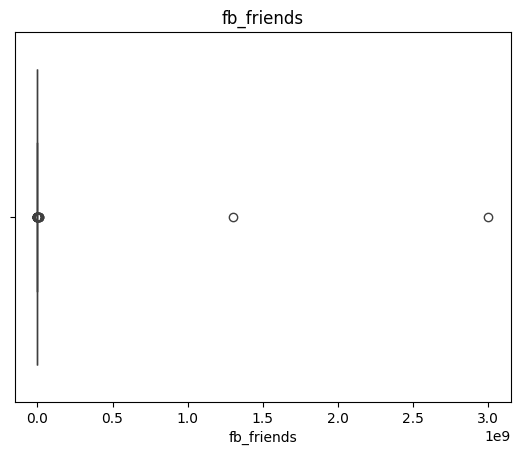

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [13]:
# 刪掉超過某個誇張數值的點，例如 > 100,000
train_df = train_df[train_df['fb_friends'] < 100000]

In [14]:
train_df.notnull().sum()

,0
gender,339
phone_os,275
height,289
weight,276
sleepiness,273
iq,276
fb_friends,339
yt,266


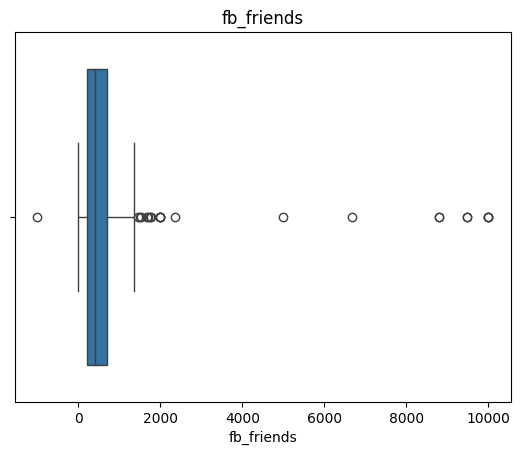

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [16]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] = np.nan

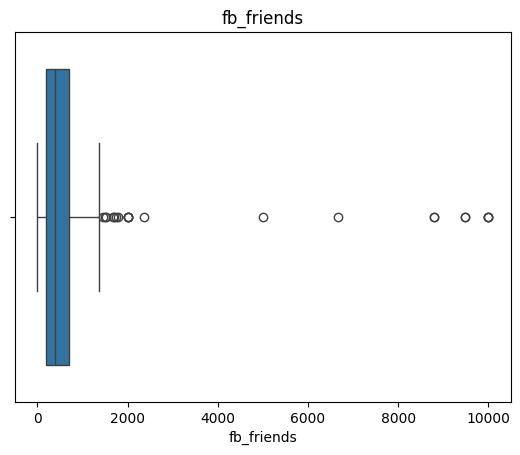

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

<h1>檢查yt資料分布

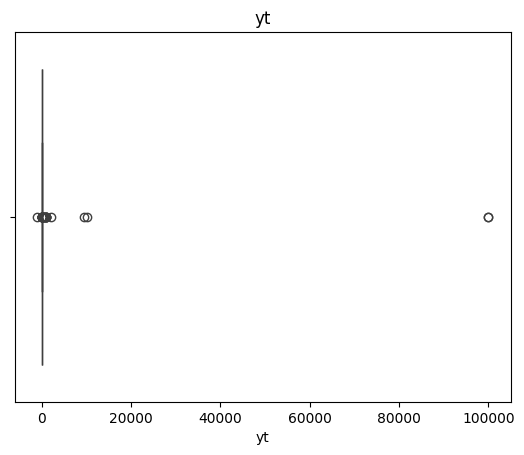

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [19]:
# 刪掉超過某個誇張數值的點，例如 > 20,000、做clip 、log1p處理資料差距
def process_yt_mobile_traffic(df, upper_limit=20000):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    df['yt'] = np.log1p(df['yt'])
    return df

train_df = process_yt_mobile_traffic(train_df)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] = np.nan

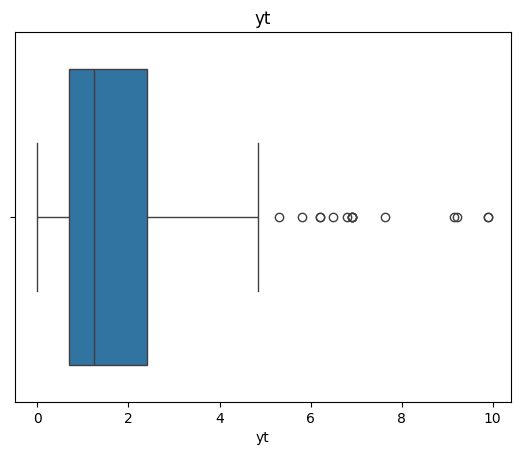

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

<h1>標記train離群值欄位

In [22]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [23]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 61 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 73 筆離群值（不在 [28.0, 100.0] 內）
 iq: 已標記 63 筆離群值（不在 [40.0, 200.0] 內）
 fb_friends: 已標記 22 筆離群值（不在 [-540.62, 1434.38] 內）
 yt: 已標記 89 筆離群值（不在 [-1.86, 4.96] 內）


<h1>標記test離群值

In [24]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [25]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 107 筆離群值（不在 [28.0, 100.0] 內）
【iq】在 test 中標記 92 筆離群值（不在 [40.0, 200.0] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-540.62, 1434.38] 內）
【yt】在 test 中標記 291 筆離群值（不在 [-1.86, 4.96] 內）


In [26]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends,is_outlier_yt
0,0,1,200.0,100.0,1.0,87.0,87.0,87.0,True,False,False,False,True
1,0,1,175.0,80.0,3.0,NaN,2000.0,NaN,False,False,True,True,True
2,0,1,155.0,45.0,3.0,150.0,NaN,9.0,False,False,False,True,True
3,0,1,173.0,85.0,4.0,NaN,NaN,15.0,False,False,True,True,True
4,0,0,164.0,57.0,4.0,130.0,505.0,2.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.0,4.0,NaN,500.0,5.0,False,False,True,False,True
422,0,0,162.0,54.0,3.0,180.0,462.0,5.0,False,False,False,False,True
423,0,1,173.0,66.0,NaN,135.0,102.0,11.1,False,False,False,False,True
424,0,<NA>,165.0,53.0,NaN,110.0,507.0,416.0,False,False,False,False,True


In [27]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends
0,2,1,154.0,43.0,NaN,NaN,583.0,0.000000,False,False,False,True,False
2,1,<NA>,170.0,61.0,NaN,90.0,540.0,NaN,True,False,False,False,False
4,2,0,158.0,67.0,NaN,128.0,320.0,0.788457,False,False,False,False,False
5,2,<NA>,NaN,NaN,3.0,100.0,903.0,1.098612,False,True,True,False,False
6,1,0,NaN,50.0,4.0,115.0,209.0,2.359910,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4.0,90.0,1000.0,0.693147,False,False,False,False,False
419,1,0,176.0,65.0,4.0,87.0,1300.0,1.098612,False,False,False,False,False
420,1,1,174.0,72.0,2.0,NaN,2000.0,2.302585,False,False,False,True,True
421,2,<NA>,167.0,50.0,3.0,180.0,483.0,2.397895,False,False,False,False,False


In [28]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

<h1>MICE填補缺失值

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer_mice = IterativeImputer(max_iter=10, random_state=42)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
train_df[numeric_cols] = imputer_mice.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = imputer_mice.transform(test_df[numeric_cols])

In [ ]:
# #XGBoost
# import xgboost as xgb

# def train_xgb_imputer(train_df):
#     imputer_models = {}
#     for col in train_df.columns:
#         known = train_df[train_df[col].notnull()]
#         if len(known) > 0:
#             model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
#             model.fit(known.drop(columns=[col]), known[col])
#             imputer_models[col] = model
#     return imputer_models

# def impute_with_xgb(train_df, test_df, imputer_models):
#     df_test_imputed = test_df.copy()
#     for col, model in imputer_models.items():
#         unknown = df_test_imputed[df_test_imputed[col].isnull()]
#         if len(unknown) > 0:
#             predictions = model.predict(unknown.drop(columns=[col]))

#             # 根據原始資料型態來決定轉換方式
#             if pd.api.types.is_integer_dtype(train_df[col]):
#                 predictions = pd.Series(predictions).round().astype(pd.Int64Dtype()).to_numpy()

#             df_test_imputed.loc[df_test_imputed[col].isnull(), col] = predictions

#     return df_test_imputed



# # 訓練 XGBoost 插補模型
# xgb_models = train_xgb_imputer(train_df)

# # 使用 XGBoost 模型插補 test_df
# # 訓練補值模型
# models = train_xgb_imputer(train_df)

# # 補 train 自己
# train_df = impute_with_xgb(train_df, train_df, models)

# # 補 test
# test_df = impute_with_xgb(train_df, test_df, models)



In [33]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends
0,2.0,1.000000,154.000000,43.000000,3.413230,120.428836,583.0,0.000000,False,False,False,True,False
2,1.0,0.410529,170.000000,61.000000,3.386346,90.000000,540.0,1.751733,True,False,False,False,False
4,2.0,0.000000,158.000000,67.000000,3.441894,128.000000,320.0,0.788457,False,False,False,False,False
5,2.0,0.436501,165.519679,57.189642,3.000000,100.000000,903.0,1.098612,False,True,True,False,False
6,1.0,0.000000,179.552771,50.000000,4.000000,115.000000,209.0,2.359910,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.0,0.000000,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,False,False,False
419,1.0,0.000000,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,False,False,False
420,1.0,1.000000,174.000000,72.000000,2.000000,126.209052,2000.0,2.302585,False,False,False,True,True
421,2.0,0.505132,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,False,False,False


In [34]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,is_outlier_fb_friends
0,0.0,1.000000,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,False,False,False
1,0.0,1.000000,175.0,80.000000,3.000000,126.313782,2000.000000,2.263764,True,False,False,True,True
2,0.0,1.000000,155.0,45.000000,3.000000,150.000000,2787.942174,9.000000,True,False,False,False,True
3,0.0,1.000000,173.0,85.000000,4.000000,127.396643,2452.238369,15.000000,True,False,False,True,True
4,0.0,0.000000,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.0,1.000000,160.0,70.000000,4.000000,120.756483,500.000000,5.000000,True,False,False,True,False
422,0.0,0.000000,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,False,False,False
423,0.0,1.000000,173.0,66.000000,3.486073,135.000000,102.000000,11.100000,True,False,False,False,False
424,0.0,0.467806,165.0,53.000000,3.375998,110.000000,507.000000,416.000000,True,False,False,False,False


In [35]:
test_df.isnull().sum()

,0
gender,0
phone_os,0
height,0
weight,0
sleepiness,0
iq,0
fb_friends,0
yt,0
is_outlier_yt,0
is_outlier_height,0


In [36]:
train_df.isnull().sum()

,0
gender,0
phone_os,0
height,0
weight,0
sleepiness,0
iq,0
fb_friends,0
yt,0
is_outlier_yt,0
is_outlier_height,0


In [37]:
test_df['gender'] = test_df['gender'].replace(1, np.nan)
test_df['gender'] = test_df['gender'].replace(2, np.nan)

<h1>DT填補類別欄位

In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# 定義補值 phone_os 的函數
def impute_phone_os_binary(df, numeric_features):
    df_clean = df.copy()

    # 將 phone_os 限定為 Apple 和 Android，NaN 保持不變，其他值轉為 NaN
    df_clean['phone_os'] = df_clean['phone_os'].apply(
        lambda x: x if pd.isna(x) or x in ['Apple', 'Android'] else np.nan
    )

    # 分離有值和缺失值的資料
    known = df_clean[df_clean['phone_os'].notna()]
    unknown = df_clean[df_clean['phone_os'].isna()]

    if len(unknown) == 0:  # 如果沒有缺失值，直接返回
        return df_clean

    # 準備特徵和目標變數
    X_train = known[numeric_features].copy()
    y_train = known['phone_os']

    X_pred = unknown[numeric_features].copy()

    # 更強健的異常值處理
    for col in numeric_features:
        # 將無限值和過大值替換為 NaN
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_pred[col] = pd.to_numeric(X_pred[col], errors='coerce')
        # 用中位數填充 NaN
        median_value = X_train[col].median()
        X_train[col] = X_train[col].replace([np.inf, -np.inf], np.nan).fillna(median_value)
        X_pred[col] = X_pred[col].replace([np.inf, -np.inf], np.nan).fillna(median_value)

    # 確保所有值在 float32 範圍內
    X_train = X_train.clip(lower=-1e38, upper=1e38)
    X_pred = X_pred.clip(lower=-1e38, upper=1e38)

    # 將目標變數編碼為 0 和 1
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)  # Apple -> 0, Android -> 1

    # 訓練決策樹模型
    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train_encoded)

    # 預測缺失值
    y_pred_encoded = clf.predict(X_pred)
    y_pred = le.inverse_transform(y_pred_encoded)

    # 將預測結果填入原始資料
    df_clean.loc[unknown.index, 'phone_os'] = y_pred

    return df_clean

# 應用補值函數
train_df = impute_phone_os_binary(train_df, numeric_features)
test_df = impute_phone_os_binary(test_df, numeric_features)

# 驗證結果
print("Train phone_os 缺失值數量：", train_df['phone_os'].isna().sum())
print("Test phone_os 缺失值數量：", test_df['phone_os'].isna().sum())
print("\nTrain phone_os 值分佈：\n", train_df['phone_os'].value_counts(dropna=False))
print("\nTest phone_os 值分佈：\n", test_df['phone_os'].value_counts(dropna=False))

# 檢查數值欄位是否有異常值
print("\n檢查 Train 數值欄位異常值：")
for col in numeric_features:
    print(f"{col}: min={train_df[col].min()}, max={train_df[col].max()}, inf_count={(train_df[col].isin([np.inf, -np.inf])).sum()}")
'''

'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.preprocessing import LabelEncoder\n\n# 定義補值 phone_os 的函數\ndef impute_phone_os_binary(df, numeric_features):\n    df_clean = df.copy()\n\n    # 將 phone_os 限定為 Apple 和 Android，NaN 保持不變，其他值轉為 NaN\n    df_clean[\'phone_os\'] = df_clean[\'phone_os\'].apply(\n        lambda x: x if pd.isna(x) or x in [\'Apple\', \'Android\'] else np.nan\n    )\n\n    # 分離有值和缺失值的資料\n    known = df_clean[df_clean[\'phone_os\'].notna()]\n    unknown = df_clean[df_clean[\'phone_os\'].isna()]\n\n    if len(unknown) == 0:  # 如果沒有缺失值，直接返回\n        return df_clean\n\n    # 準備特徵和目標變數\n    X_train = known[numeric_features].copy()\n    y_train = known[\'phone_os\']\n\n    X_pred = unknown[numeric_features].copy()\n\n    # 更強健的異常值處理\n    for col in numeric_features:\n        # 將無限值和過大值替換為 NaN\n        X_train[col] = pd.to_numeric(X_train[col], errors=\'coerce\')\n        X_pred[col] = pd.to_numeric(X_pred[col], erro

<h1> Featuretools 進行資料萃取

In [38]:
pip install featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 15.0 MB/s eta 0:00:00


In [39]:
import featuretools as ft
from xgboost import XGBClassifier

train_df['id'] = id_train_backup
test_df['id'] = id_test_backup

In [40]:
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
              'absolute',
              'negate'
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [41]:
exclude_cols = ['gender', 'phone_os']

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness_x,iq_x,fb_friends_x,yt_x,is_outlier_yt_x,is_outlier_height_x,...,height - iq,height - sleepiness,height - weight,height - yt,iq - sleepiness,iq - weight,iq - yt,sleepiness - weight,sleepiness - yt,weight - yt
0,2.0,1.000000,154.000000,43.000000,3.413230,120.428836,583.0,0.000000,False,False,...,33.571164,150.586770,111.000000,154.000000,117.015606,77.428836,120.428836,-39.586770,3.413230,43.000000
1,1.0,0.410529,170.000000,61.000000,3.386346,90.000000,540.0,1.751733,True,False,...,80.000000,166.613654,109.000000,168.248267,86.613654,29.000000,88.248267,-57.613654,1.634613,59.248267
2,2.0,0.000000,158.000000,67.000000,3.441894,128.000000,320.0,0.788457,False,False,...,30.000000,154.558106,91.000000,157.211543,124.558106,61.000000,127.211543,-63.558106,2.653437,66.211543
3,2.0,0.436501,165.519679,57.189642,3.000000,100.000000,903.0,1.098612,False,True,...,65.519679,162.519679,108.330037,164.421067,97.000000,42.810358,98.901388,-54.189642,1.901388,56.091030
4,1.0,0.000000,179.552771,50.000000,4.000000,115.000000,209.0,2.359910,False,True,...,64.552771,175.552771,129.552771,177.192861,111.000000,65.000000,112.640090,-46.000000,1.640090,47.640090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1.0,0.000000,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,...,76.000000,162.000000,100.000000,165.306853,86.000000,24.000000,89.306853,-62.000000,3.306853,65.306853
335,1.0,0.000000,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,...,89.000000,172.000000,111.000000,174.901388,83.000000,22.000000,85.901388,-61.000000,2.901388,63.901388
336,1.0,1.000000,174.000000,72.000000,2.000000,126.209052,2000.0,2.302585,False,False,...,47.790948,172.000000,102.000000,171.697415,124.209052,54.209052,123.906467,-70.000000,-0.302585,69.697415
337,2.0,0.505132,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,...,-13.000000,164.000000,117.000000,164.602105,177.000000,130.000000,177.602105,-47.000000,0.602105,47.602105


In [42]:
# 目標欄位
target_col = 'gender'

# 特徵與標籤
X = train_df_combined.drop(columns=['id', 'gender'])
y = train_df_combined['gender'].map({1: 0, 2: 1})  # 不動原始欄位

# ✅ 清理 inf / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
X = X.clip(lower=-1e6, upper=1e6)  # 可選：限制極端值

# 建立模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)


# 特徵重要性對應每個欄位
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# 排序（由高到低）
feature_importances = feature_importances.sort_values(ascending=False)

# 顯示前 20 名最重要的特徵
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
ABSOLUTE(weight)           0.145448
height + sleepiness        0.090552
height + yt                0.083476
height_x                   0.055789
height / weight            0.046724
fb_friends / sleepiness    0.040555
is_outlier_height_x        0.034358
iq / weight                0.029708
height - yt                0.026335
iq + sleepiness            0.023936
dtype: float32


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

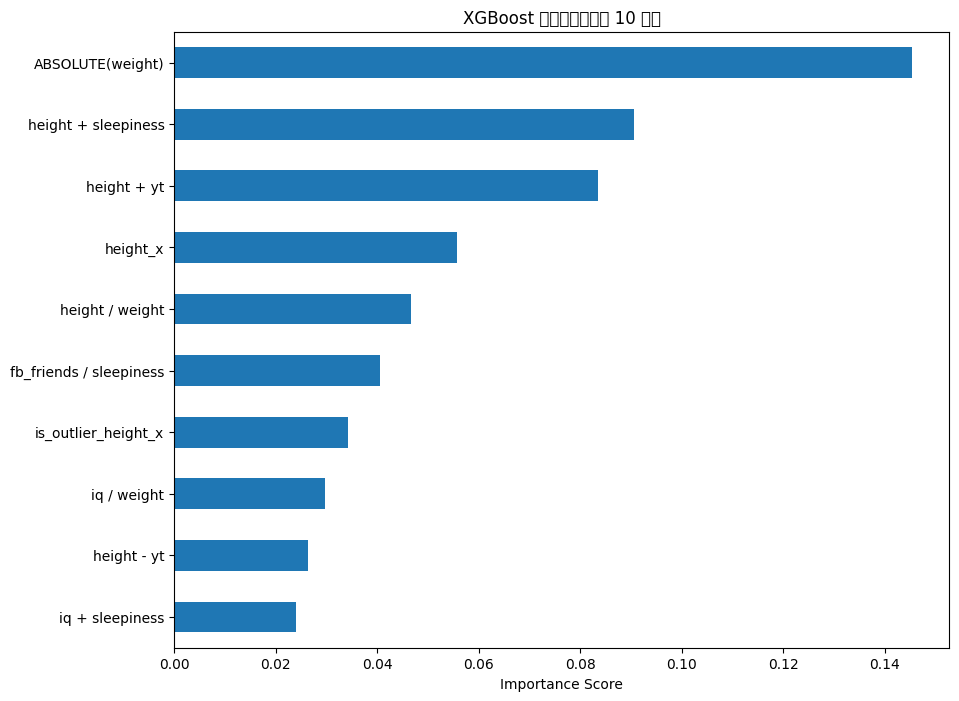

In [43]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost 特徵重要性（前 10 名）")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [44]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = train_df_combined[['id'] + top_10_features]
test_top_features = test_df_combined[['id'] + top_10_features]

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

<h1>TFID處理self_intro

In [45]:
train_df['self_intro'] = self_train_backup.loc[train_df.index]
test_df['self_intro'] = self_test_backup.loc[test_df.index]

In [46]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,height + sleepiness,height + yt,height_x,height / weight,fb_friends / sleepiness,is_outlier_height_x,iq / weight,height - yt,iq + sleepiness,self_intro
0,2.0,1.000000,154.000000,43.000000,3.413230,120.428836,583.0,0.000000,False,False,...,157.413230,154.000000,154.000000,3.581395,170.805948,False,2.800671,154.000000,123.842066,Beautiful
1,1.0,0.410529,170.000000,61.000000,3.386346,90.000000,540.0,1.751733,True,False,...,173.386346,171.751733,170.000000,2.786885,159.463925,False,1.475410,168.248267,93.386346,Enjoying being who I'm notsss
2,2.0,0.000000,158.000000,67.000000,3.441894,128.000000,320.0,0.788457,False,False,...,161.441894,158.788457,158.000000,2.358209,92.972055,False,1.910448,157.211543,131.441894,Practice Makes perfect
3,2.0,0.436501,165.519679,57.189642,3.000000,100.000000,903.0,1.098612,False,True,...,168.519679,166.618291,165.519679,2.894225,301.000000,True,1.748568,164.421067,103.000000,Straightforward
4,1.0,0.000000,179.552771,50.000000,4.000000,115.000000,209.0,2.359910,False,True,...,183.552771,181.912681,179.552771,3.591055,52.250000,True,2.300000,177.192861,119.000000,Humorous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1.0,0.000000,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,...,170.000000,166.693147,166.000000,2.515152,250.000000,False,1.363636,165.306853,94.000000,NaN
335,1.0,0.000000,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,...,180.000000,177.098612,176.000000,2.707692,325.000000,False,1.338462,174.901388,91.000000,NaN
336,1.0,1.000000,174.000000,72.000000,2.000000,126.209052,2000.0,2.302585,False,False,...,176.000000,176.302585,174.000000,2.416667,1000.000000,False,1.752903,171.697415,128.209052,NaN
337,2.0,0.505132,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,...,170.000000,169.397895,167.000000,3.340000,161.000000,False,3.600000,164.602105,183.000000,Handsome


In [47]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,height + sleepiness,height + yt,height_x,height / weight,fb_friends / sleepiness,is_outlier_height_x,iq / weight,height - yt,iq + sleepiness,self_intro
0,0.0,1.000000,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,...,201.000000,287.000000,200.0,2.000000,87.000000,True,0.870000,113.000000,88.000000,GOod
1,0.0,1.000000,175.0,80.000000,3.000000,126.313782,2000.000000,2.263764,True,False,...,178.000000,177.263764,175.0,2.187500,666.666667,False,1.578922,172.736236,129.313782,Easygoing
2,0.0,1.000000,155.0,45.000000,3.000000,150.000000,2787.942174,9.000000,True,False,...,158.000000,164.000000,155.0,3.444444,929.314058,False,3.333333,146.000000,153.000000,NaN
3,0.0,1.000000,173.0,85.000000,4.000000,127.396643,2452.238369,15.000000,True,False,...,177.000000,188.000000,173.0,2.035294,613.059592,False,1.498784,158.000000,131.396643,NaN
4,0.0,0.000000,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,...,168.000000,166.000000,164.0,2.877193,126.250000,False,2.280702,162.000000,134.000000,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.0,1.000000,160.0,70.000000,4.000000,120.756483,500.000000,5.000000,True,False,...,164.000000,165.000000,160.0,2.285714,125.000000,False,1.725093,155.000000,124.756483,I am a girl.
422,0.0,0.000000,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,...,165.000000,167.000000,162.0,3.000000,154.000000,False,3.333333,157.000000,183.000000,NaN
423,0.0,1.000000,173.0,66.000000,3.486073,135.000000,102.000000,11.100000,True,False,...,176.486073,184.100000,173.0,2.621212,29.259285,False,2.045455,161.900000,138.486073,I like to play basketball.
424,0.0,0.467806,165.0,53.000000,3.375998,110.000000,507.000000,416.000000,True,False,...,168.375998,581.000000,165.0,3.113208,150.177816,False,2.075472,-251.000000,113.375998,Good


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,tired,to,wanna,want,who,work,world,xd,you,zzzz
0,2,1,154.000000,43.000000,4.047414,110.373390,583.0,0.000000,False,False,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0,170.000000,61.000000,2.852102,90.000000,540.0,6.753442,True,False,...,0.0,0.0,0.0,0.0,0.516103,0.0,0.0,0.0,0.0,0.0
2,2,0,158.000000,67.000000,3.123252,128.000000,320.0,0.788457,False,False,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2,0,115.802376,79.160461,3.000000,100.000000,903.0,1.098612,False,True,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,0,21.035442,50.000000,4.000000,115.000000,209.0,2.359910,False,True,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1,0,166.000000,66.000000,4.000000,90.000000,1000.0,0.693147,False,False,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
335,1,0,176.000000,65.000000,4.000000,87.000000,1300.0,1.098612,False,False,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
336,1,1,174.000000,72.000000,2.000000,128.571121,2000.0,2.302585,False,False,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
337,2,1,167.000000,50.000000,3.000000,180.000000,483.0,2.397895,False,False,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [49]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,tired,to,wanna,want,who,work,world,xd,you,zzzz
0,0,1,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,175.0,80.000000,3.000000,149.781342,2000.000000,6.325191,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,155.0,45.000000,3.000000,150.000000,2211.355225,9.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,173.0,85.000000,4.000000,116.439514,8444.636719,15.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.000000,4.000000,98.029556,500.000000,5.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0,0,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0,1,173.0,66.000000,4.074343,135.000000,102.000000,11.100000,True,False,...,0.0,0.527905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0,1,165.0,53.000000,4.372456,110.000000,507.000000,416.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>檢查資料不平衡

In [50]:
print(train_df['gender'].value_counts(normalize=True))

gender
1.0    0.758112
2.0    0.241888
Name: proportion, dtype: float64


In [51]:
pip install imbalanced-learn

In [ ]:
# from imblearn.combine import SMOTEENN
# from collections import Counter

# # 假設你已完成補值 & TF-IDF，且 gender 是目標欄位
# X = train_df.drop(columns=['gender']).astype(float)
# y = train_df['gender']

# # 初始化 SMOTEENN
# smote_enn = SMOTEENN(random_state=42)

# # 重取樣
# X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# # 查看前後類別分佈
# print("🔍 原始分佈：", Counter(y))
# print("✅ SMOTEENN 後：", Counter(y_resampled))



<h1>SMOTE處理資料不平衡

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
# SMOTE 標籤轉為 0 和 1
y_encoded = y - 1  # gender: 1/2 → 0/1


# SMOTE 重抽樣
X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y_encoded)

print(" SMOTE 後分佈：", Counter(y_smote))


 SMOTE 後分佈： Counter({1.0: 257, 0.0: 257})


<h1>XGBOOST分類模型

ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [ ]:
# from xgboost import XGBClassifier
# #  建立模型
# clf = XGBClassifier(
#     max_depth=5,
#     learning_rate=0.1,
#     n_estimators=100,
#     eval_metric='logloss',
#     random_state=42
# )

# # 模型訓練
# clf.fit(X_smote, y_smote)

# # 預測：X_test 的準備記得也要和 train_df 的欄位一致
# X_test = test_df.drop(columns=['gender']).astype(float)

# # 預測結果：轉回原本的 1/2 標籤
# y_test_pred = clf.predict(X_test) + 1


In [53]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
gender        0
phone_os      0
height        0
weight        0
sleepiness    0
             ..
work          0
world         0
xd            0
you           0
zzzz          0
Length: 123, dtype: int64

Test 欄位缺失情況：
gender        0
phone_os      0
height        0
weight        0
sleepiness    0
             ..
work          0
world         0
xd            0
you           0
zzzz          0
Length: 123, dtype: int64


# **Random forest分類模型**

In [54]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)

# 處理異常值（參考 X_smote 而非 X_train）
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # 轉為數值，無效值變 NaN
    # 使用 X_smote 的中位數填充（因為 X_smote 是訓練數據）
    X_test[col] = X_test[col].replace([np.inf, -np.inf], np.nan).fillna(X_smote[col].median())
    X_test[col] = X_test[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = rf_clf.predict(X_test) + 1

In [55]:
test_df['gender'] = y_test_pred

In [56]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_yt,is_outlier_height,...,tired,to,wanna,want,who,work,world,xd,you,zzzz
0,1.0,1.000000,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,True,True,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.000000,175.0,80.000000,3.000000,126.313782,2000.000000,2.263764,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.000000,155.0,45.000000,3.000000,150.000000,2787.942174,9.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.000000,173.0,85.000000,4.000000,127.396643,2452.238369,15.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.000000,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2.0,1.000000,160.0,70.000000,4.000000,120.756483,500.000000,5.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,2.0,0.000000,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,1.0,1.000000,173.0,66.000000,3.486073,135.000000,102.000000,11.100000,True,False,...,0.0,0.527905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,2.0,0.467806,165.0,53.000000,3.375998,110.000000,507.000000,416.000000,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1.0,297
2.0,129


In [60]:
from sklearn.model_selection import cross_val_score
y_adjusted = y - 1
scores = cross_val_score(rf_clf, X, y_adjusted, cv=5, scoring='accuracy')

print("五折交叉驗證準確率（每折）：", scores)
print("平均準確率：", np.mean(scores))

五折交叉驗證準確率（每折）： [0.79411765 0.89705882 0.91176471 0.82352941 0.89552239]
平均準確率： 0.8643985952589992


In [61]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_rf.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！
